In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import libraries and dataset**:This code block initializes the Python environment with necessary libraries for data handling and visualization (numpy, pandas, matplotlib.pyplot, seaborn), as well as for machine learning preprocessing tasks (sklearn). It then loads an avocado dataset from a specified file path into a pandas DataFrame named df and displays the first few rows to provide an overview of the dataset's structure and contents.

In [27]:

import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Load the dataset
file_path = '/content/avocado.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to get an overview
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


**Numerical and Categorical data**:
This code segment identifies and separates the categorical and numerical features from the avocado dataset. Categorical features are determined based on the 'object' data type and the inclusion of the 'year' column, while numerical features are identified by 'float64' and 'int64' data types, excluding 'Unnamed: 0' and 'year' for clarity and relevance in analysis.

In [21]:
# Listing categorical and numerical features available in the dataset

# Categorical features: based on data type 'object' and specific columns identified as categorical
categorical_features = list(df.select_dtypes(include=['object']).columns) + ['year']  # Including 'year' as categorical

# Numerical features: based on data type 'float64' and 'int64', excluding the 'year' column
numerical_features = list(df.select_dtypes(include=['float64', 'int64']).columns)
numerical_features.remove('Unnamed: 0')  # Removing 'Unnamed: 0' as it is just an identifier
if 'year' in numerical_features: numerical_features.remove('year')  # Ensuring 'year' is not listed as numerical

categorical_features, numerical_features


(['Date', 'type', 'region', 'year'],
 ['AveragePrice',
  'Total Volume',
  '4046',
  '4225',
  '4770',
  'Total Bags',
  'Small Bags',
  'Large Bags',
  'XLarge Bags'])

**Calculating the % of missing values:**This code calculates and displays the percentage of missing values in both the categorical and numerical features of the avocado dataset, helping identify any columns that may require cleaning or imputation.






In [23]:
# Calculating the percentage of missing values for both categorical and numerical features

# For categorical features
missing_values_categorical = df[categorical_features].isnull().mean() * 100

# For numerical features
missing_values_numerical = df[numerical_features].isnull().mean() * 100

missing_values_categorical, missing_values_numerical


(Date      0.0
 type      0.0
 region    0.0
 year      0.0
 dtype: float64,
 AveragePrice    0.0
 Total Volume    0.0
 4046            0.0
 4225            0.0
 4770            0.0
 Total Bags      0.0
 Small Bags      0.0
 Large Bags      0.0
 XLarge Bags     0.0
 dtype: float64)

This code handles missing values in the avocado dataset by filling numerical columns with their median values and categorical columns with their mode. It also removes an unnecessary 'Unnamed: 0' column if present and converts the 'Date' column to a datetime format for proper time series analysis.

In [58]:
# For numerical columns, fill missing values with the median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, fill missing values with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

**Visualizing 'Type', 'Year', 'Region'**:This code visualizes the distributions of avocado types, yearly observations, and the regional spread within the dataset using count plots, providing insights into the variety of avocados, data distribution over years, and the geographical diversity of the data.

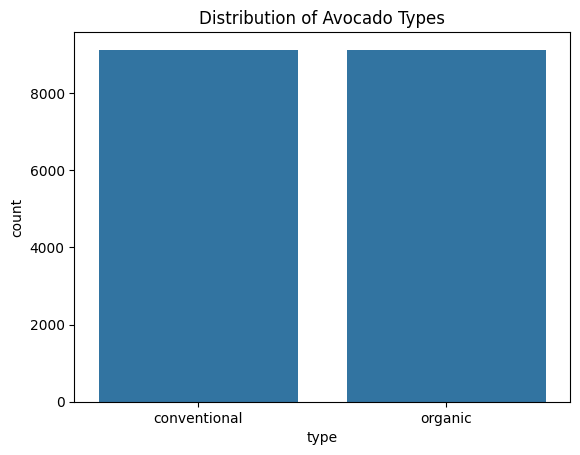

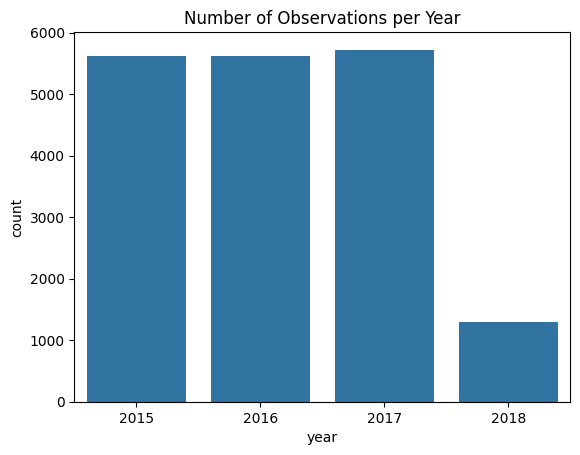

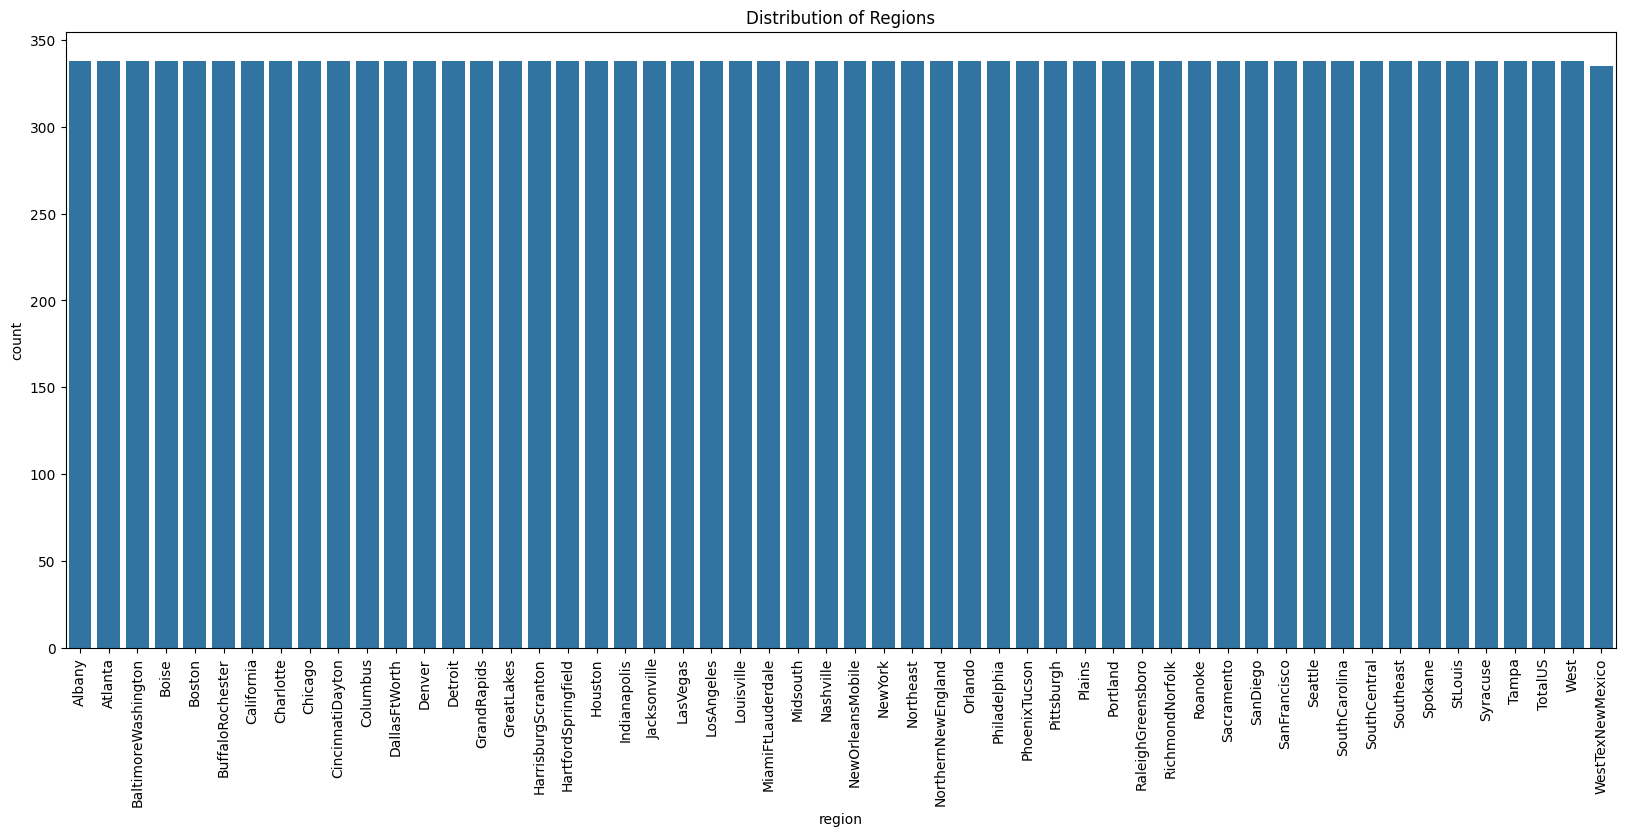

In [30]:
# Visualizing the 'type' of avocado using countplot
sns.countplot(x='type', data=df)
plt.title('Distribution of Avocado Types')
plt.show()


# Visualizing the 'year' distribution to see the number of observations per year
sns.countplot(x='year', data=df)
plt.title('Number of Observations per Year')
plt.show()

# Visualizing the distribution of 'region'
plt.figure(figsize=(20, 8))
sns.countplot(x='region', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Regions')
plt.show()


**Performing label encoding for 'Type':**This code applies label encoding to the 'type' column of the avocado dataset, transforming the categorical types of avocado (e.g., conventional, organic) into numerical values, and stores the result in a new column named 'type_encoded'.

In [33]:
# Label encode 'type' column
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

**Performing One-hot encoding for 'Region':**This code performs one-hot encoding on the 'region' column of the avocado dataset, creating a new binary column for each unique region value. The resulting binary columns are prefixed with 'region' to indicate their origin from the original 'region' column, effectively transforming the categorical 'region' data into a format suitable for machine learning models.

In [34]:
# One-hot encode 'region' column
df = pd.get_dummies(df, columns=['region'], prefix='region')

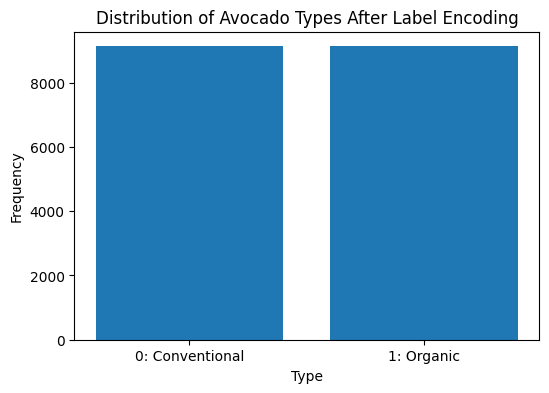

In [35]:

plt.figure(figsize=(6, 4))
# Plotting the histogram without the 'labels' parameter
counts, bins, patches = plt.hist(df['type_encoded'], bins=[-0.5, 0.5, 1.5], rwidth=0.8)
plt.xticks(ticks=[0, 1], labels=['0: Conventional', '1: Organic'])
plt.title('Distribution of Avocado Types After Label Encoding')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

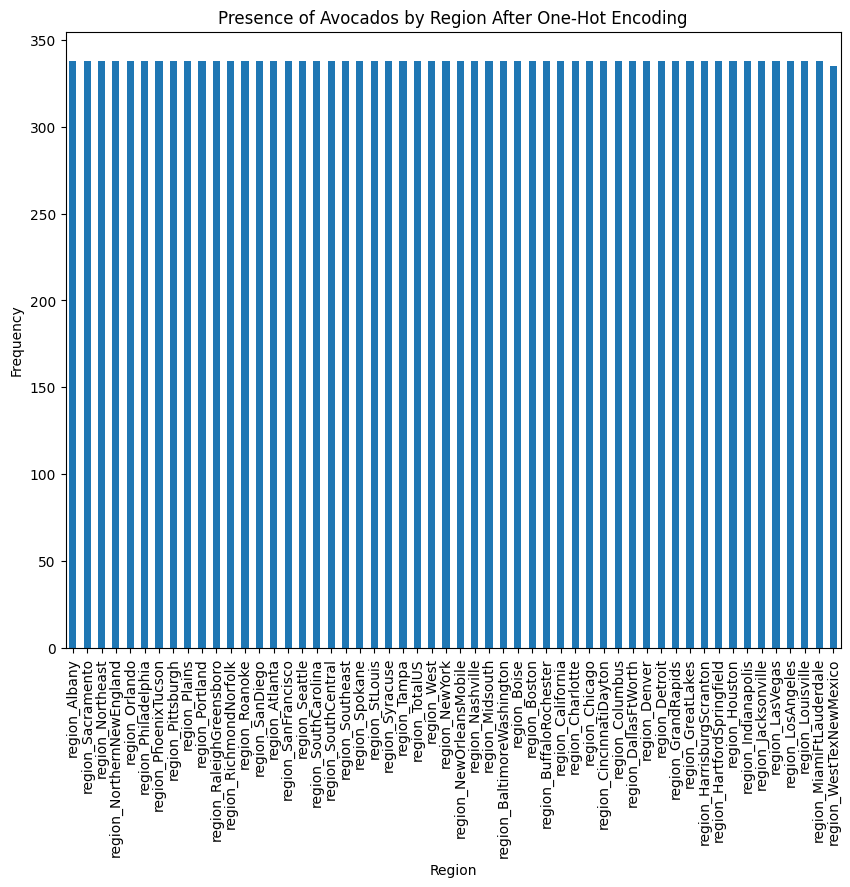

In [36]:
# Assuming the DataFrame 'df' has been one-hot encoded for the 'region' column
region_columns = [col for col in df.columns if col.startswith('region_')]
region_presence = df[region_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
region_presence.plot(kind='bar')
plt.title('Presence of Avocados by Region After One-Hot Encoding')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate labels to make them readable
plt.show()


Boxplot before handling outliers

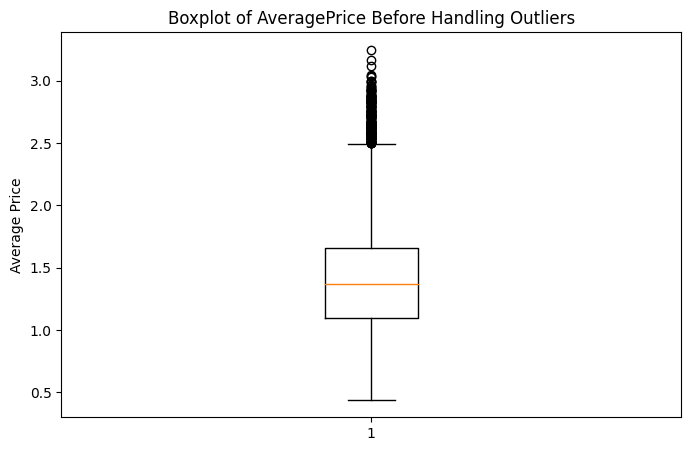

In [37]:
# Boxplot for 'AveragePrice' before handling outliers
plt.figure(figsize=(8, 5))
plt.boxplot(df['AveragePrice'])
plt.title('Boxplot of AveragePrice Before Handling Outliers')
plt.ylabel('Average Price')
plt.show()

In [38]:
# Handling outliers for 'AveragePrice'
Q1 = df['AveragePrice'].quantile(0.25)
Q3 = df['AveragePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['AveragePrice'] = df['AveragePrice'].clip(lower=lower_bound, upper=upper_bound)


Boxplot after handling outliers

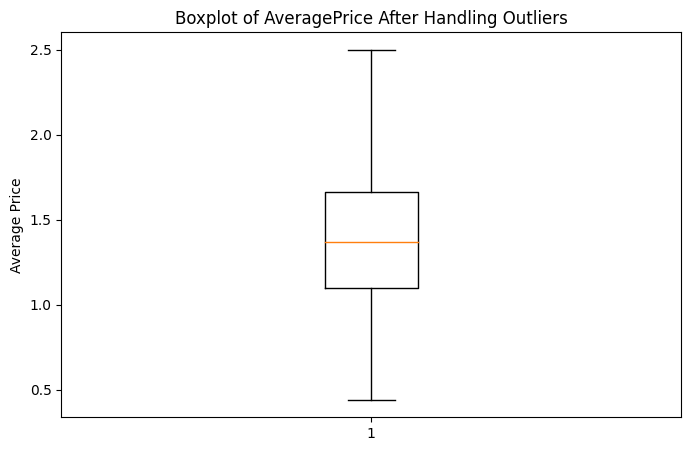

In [39]:
# Boxplot for 'AveragePrice' after handling outliers
plt.figure(figsize=(8, 5))
plt.boxplot(df['AveragePrice'])
plt.title('Boxplot of AveragePrice After Handling Outliers')
plt.ylabel('Average Price')
plt.show()

**Splitting the data into testing and training set**

In [40]:
# Separate features and target variable, excluding 'Date' from features to be scaled
features = df.drop(['AveragePrice', 'Date', 'type'], axis=1)  # Assuming preprocessing on 'type' is done beforehand
target = df['AveragePrice']
date_series = df['Date']  # Retain the Date column

In [41]:
# Split the data into training and testing sets first
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Also split the 'Date' column to align with the train-test split
date_train, date_test = train_test_split(date_series, test_size=0.3, random_state=42)

# Now scale the features excluding 'Date'
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Convert the scaled arrays back to DataFrame and reattach the 'Date' column
X_train_df = pd.DataFrame(X_train_scaled, columns=features.columns, index=X_train.index)
X_test_df = pd.DataFrame(X_test_scaled, columns=features.columns, index=X_test.index)
X_train_df['Date'] = date_train
X_test_df['Date'] = date_test

# Ensure 'Date' column is at the first position if needed
X_train_df = X_train_df[['Date'] + [col for col in X_train_df.columns if col != 'Date']]
X_test_df = X_test_df[['Date'] + [col for col in X_test_df.columns if col != 'Date']]

# Combine with the target variable for saving
train_df = pd.concat([X_train_df, y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test_df, y_test.reset_index(drop=True)], axis=1)
# Save the datasets to CSV files
train_file_path = '/content/train_avocado.csv'
test_file_path = '/content/test_avocado.csv'
train_df.to_csv(train_file_path, index=False)
test_df.to_csv(test_file_path, index=False)

print("Preprocessing complete. Files saved.")

Preprocessing complete. Files saved.


In [44]:
print("Final Dataset Characteristics:")
print(f"- Total records in training set: {train_df.shape[0]}")
print(f"- Total records in testing set: {test_df.shape[0]}")
print(f"- Number of features used: {len(features.columns)}")
print("- Date column included and in datetime format.")
print("- Categorical variables encoded appropriately.")
print("- Features scaled to standardize data distribution.")
print("- Data split into training and testing sets for model training and evaluation.")

# Display first few rows of the training set to show the outcome
print("\nFirst few rows of the training set:")
print(train_df.head())

Final Dataset Characteristics:
- Total records in training set: 16629
- Total records in testing set: 9326
- Number of features used: 65
- Date column included and in datetime format.
- Categorical variables encoded appropriately.
- Features scaled to standardize data distribution.
- Data split into training and testing sets for model training and evaluation.

First few rows of the training set:
             Date  Unnamed: 0  Total Volume      4046      4225      4770  \
8704   2018-01-14   -0.915239      0.132919  0.200578 -0.003979 -0.154964   
5271   2016-08-14   -0.333423     -0.224342 -0.216713 -0.231347 -0.189093   
7654   2017-07-16   -0.010192     -0.171040 -0.165390 -0.179040 -0.193562   
2417   2015-07-05    0.054454      0.996475  1.924032  0.242635  0.674737   
11906  2015-07-05   -0.010192     -0.244668 -0.231191 -0.241167 -0.210247   

       Total Bags  Small Bags  Large Bags  XLarge Bags  ...  \
8704     0.233870    0.234573    0.241358    -0.172326  ...   
5271    -0.2

# **Questions:**

  1) **How does the average price of avocados vary by type and over years?**

*  Line plot to visualize the average price trend over years for both conventional and organic avocados.
*   Group data by 'year' and 'type', then calculate the mean of 'AveragePrice'.

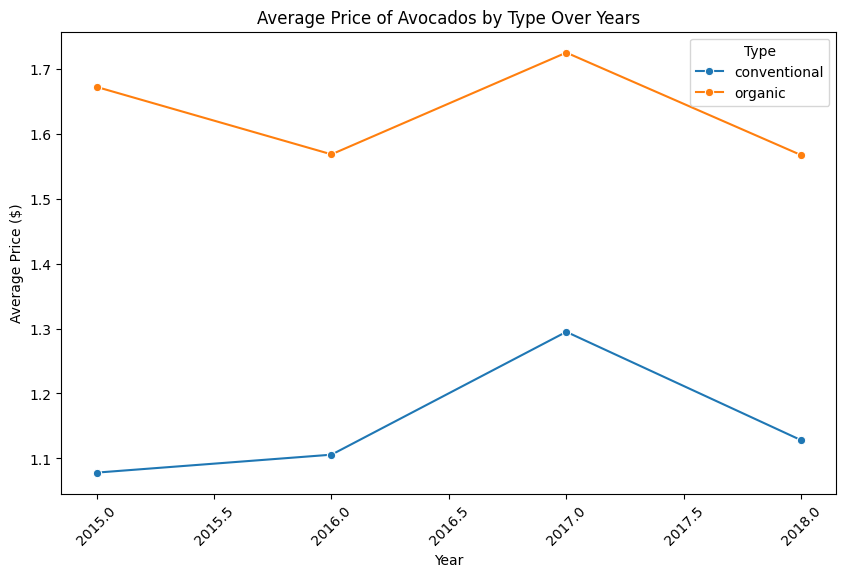

In [45]:
# Grouping data by 'year' and 'type', then calculating the mean of 'AveragePrice'
average_price_by_year_type = df.groupby(['year', 'type'])['AveragePrice'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_price_by_year_type, x='year', y='AveragePrice', hue='type', marker='o')
plt.title('Average Price of Avocados by Type Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

In [47]:
print(df.columns)


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'type_encoded', 'region_Albany', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTu

2) **What is the relationship between total volume and average price for different types of avocados, and how does this relationship vary across regions?**

*   This explores the potential correlation between supply (volume) and price, differentiated by type and region.
*   Scatter plots or hexbin plots to visualize the relationship between 'Total Volume' and 'AveragePrice' for each type of avocado.
*  Separate plots for a selection of regions to compare regional variations.








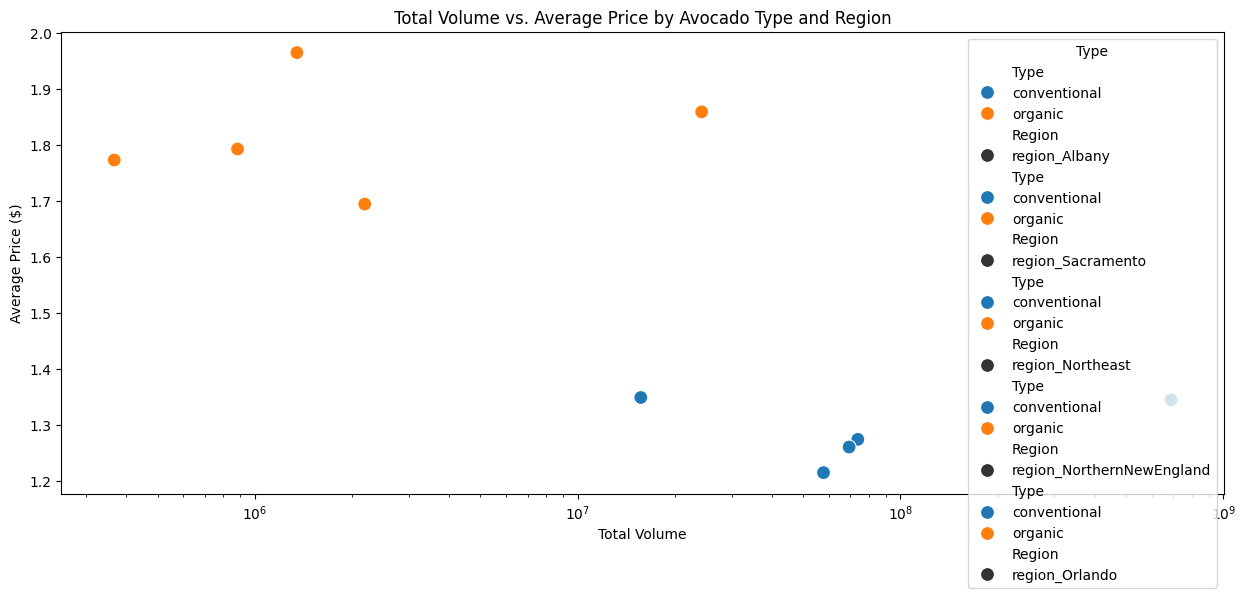

In [49]:
plt.figure(figsize=(15, 6))

# Plotting for each region without using 'label' in sns.scatterplot()
for region in top_regions:
    # Filter data for the current region
    df_region = df_aggregated[df_aggregated['Region'] == region]

    # Plotting
    sns.scatterplot(data=df_region, x='Total Volume', y='Average Price', hue='Type', style='Region', s=100)

plt.title('Total Volume vs. Average Price by Avocado Type and Region')
plt.xlabel('Total Volume')
plt.ylabel('Average Price ($)')
plt.xscale('log')  # Using a log scale for Total Volume for better readability
plt.legend(title='Type', loc='upper right')
plt.show()


**3) Which type of avocado (conventional or organic) has sold more total bags?**

> The bar plot displays the total bags sold for each type of avocado (conventional and organic). The height of each bar represents the total number of bags sold, with one bar corresponding to each type of avocado. This visualization allows us to compare the total sales volume between conventional and organic avocados.








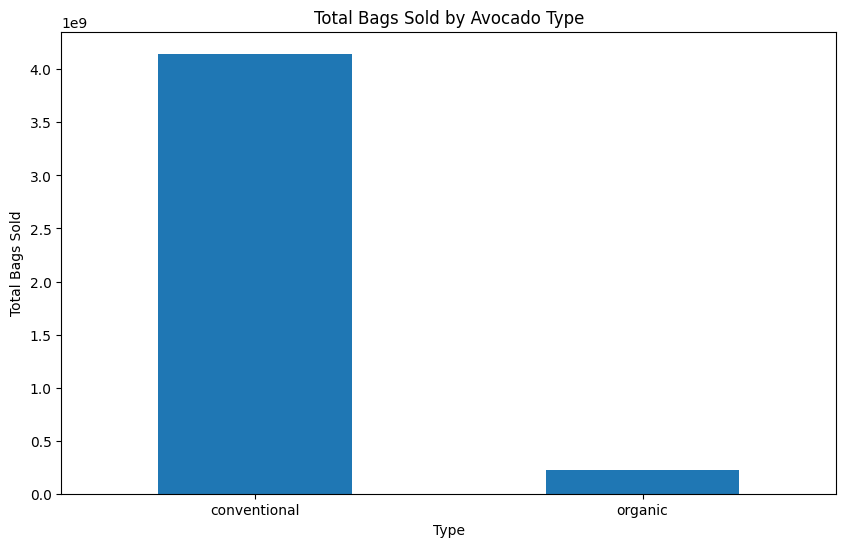

In [51]:
# Summing total bags for each type
total_bags_by_type = df.groupby('type')['Total Bags'].sum()

# Creating a bar plot for total bags sold by type
total_bags_by_type.plot(kind='bar', figsize=(10, 6), title='Total Bags Sold by Avocado Type')
plt.xlabel('Type')
plt.ylabel('Total Bags Sold')
plt.xticks(rotation=0)
plt.show()

**4)How does the distribution of bag sizes (small, large, and extra-large) vary between different types of avocados (conventional and organic) across different sales volume levels?**

---



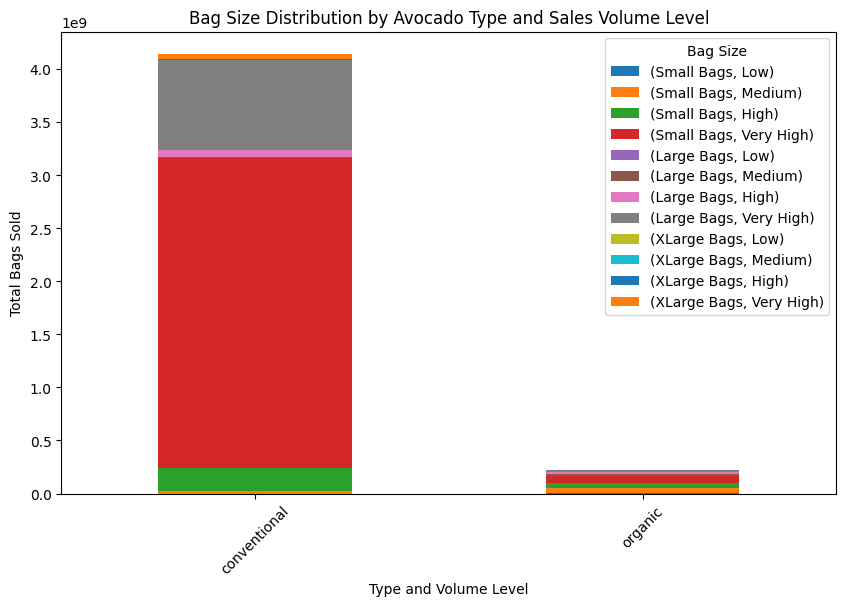

In [52]:
# Categorizing 'Total Volume' into levels
volume_bins = pd.qcut(df['Total Volume'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['Volume Level'] = volume_bins

# Aggregating bag sizes by type and volume level
bag_size_distribution = df.groupby(['type', 'Volume Level'])[['Small Bags', 'Large Bags', 'XLarge Bags']].sum()

# Plotting
bag_size_distribution.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Bag Size Distribution by Avocado Type and Sales Volume Level')
plt.xlabel('Type and Volume Level')
plt.ylabel('Total Bags Sold')
plt.xticks(rotation=45)
plt.legend(title='Bag Size')
plt.show()

**5)What is the seasonality in avocado prices, and how does it differ between conventional and organic avocados across the top regions?**

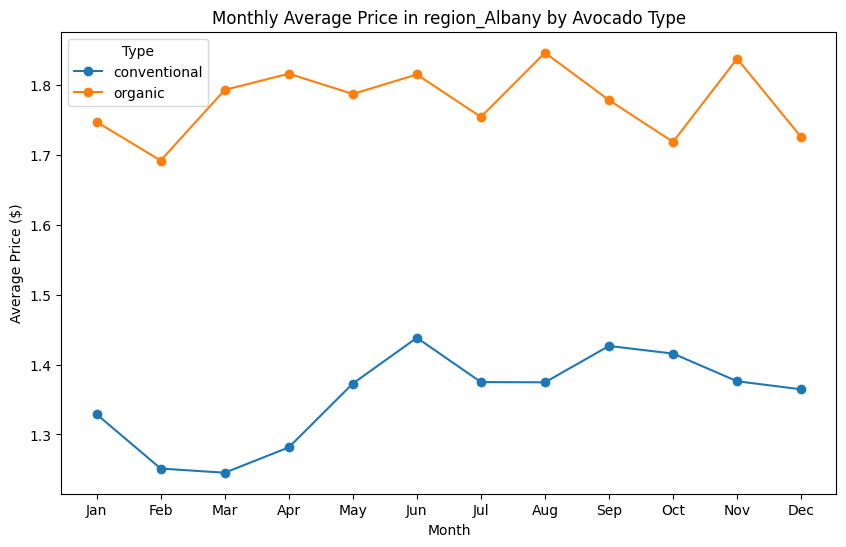

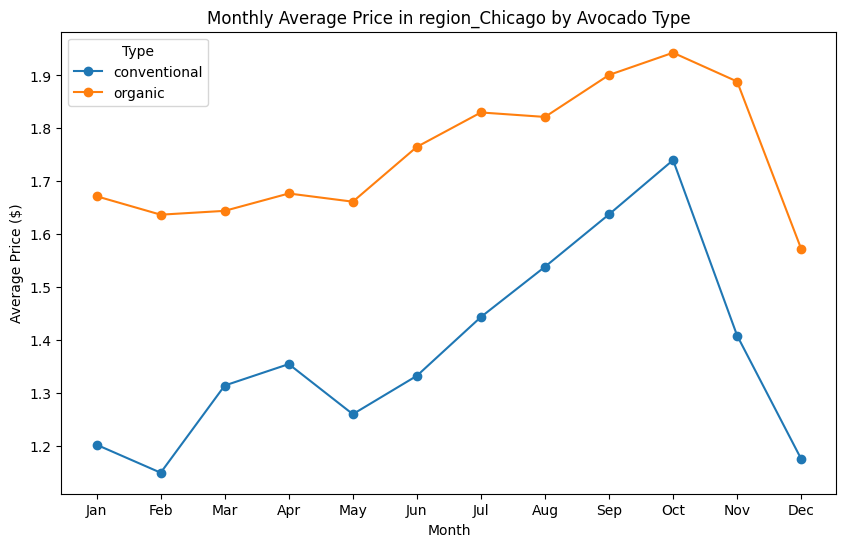

In [53]:
# Converting 'Date' to datetime and extracting month
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Selecting top regions based on a predefined list or aggregation
top_regions_encoded = ['region_Albany', 'region_Chicago']  # Example, adjust based on actual data

# Filtering data for top regions and calculating monthly average price by type
for region in top_regions_encoded:
    df_region = df[df[region] == 1]
    monthly_price = df_region.groupby(['Month', 'type'])['AveragePrice'].mean().unstack()

    # Plotting
    monthly_price.plot(kind='line', marker='o', figsize=(10, 6))
    plt.title(f'Monthly Average Price in {region} by Avocado Type')
    plt.xlabel('Month')
    plt.ylabel('Average Price ($)')
    plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Type')
    plt.show()